<a href="https://colab.research.google.com/github/kjjyyy/age-friendly-busan/blob/test/OSS%EC%8B%A4%EC%8A%B56%EC%9E%A5_GIS_with_OSMNX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code : Setup / 도로타입 표시하기

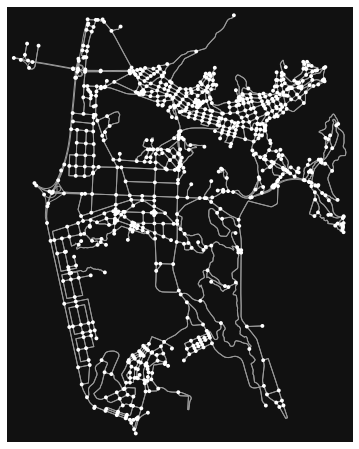

In [17]:
import networkx as nx
import osmnx as ox 
import matplotlib.pyplot as plt

place = "Saha-gu, Busan, Korea"
G = ox.graph_from_place(place, network_type="drive")
fig, ax = ox.plot_graph(G)

# edge의 타입 따라서 도로에 대한 색깔 다르게 표시하기
hwy_colors = {'footway' : 'skyblue',
              'residential' : 'paleturquoise',
              'cycleway' : 'lightgreen',
              'service' : 'sienna',
              'living street' : 'orange',
              'secondary' : 'black',
              'pedstrian' : 'lightskyblue'}

# edge를 탐색
def find_edges(G, hwys) : 
  edges = []
  for u, v, k, data in G.edges(keys=True, data='highway') :
    check1 = isinstance(data, str) and data not in hwys
    check2 = isinstance(data, list) and all ([d not in hwys for d in data])
    if check1 or check2 : 
      edges.append((u,v,k))
    return set(edges)

# hwy이 정해지지 않은 경우는 black
G_tmp = G.copy()
G_tmp.remove_edges_from(G.edges - find_edges(G, hwy_colors.keys()))
m = ox.plot_graph_folium(G_tmp, popup_attribute = 'highway', weight=5, color='black')

#지도 위에서 Hwy_colors에서 정해진 타입에 따라 추가적인 edge를 그림
for hwy, color in hwy_colors.items() : 
  G_tmp=G.copy()
  G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
  if G_tmp.edges : 
    m=ox.plot_graph_folium(G_tmp,
                           graph_map=m,
                           popup_attribute='highway',
                           weight=5,
                           color=color)

Code : 최단거리

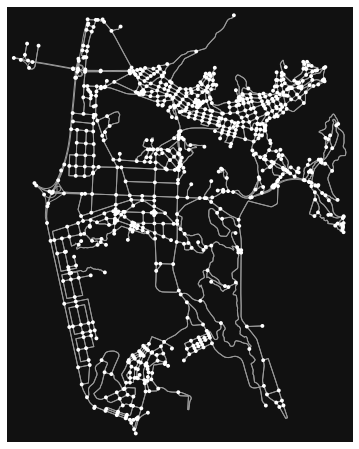

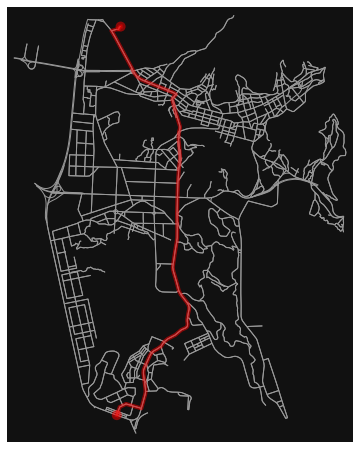

In [16]:
import networkx as nx
import osmnx as ox 
import matplotlib.pyplot as plt

place = "Saha-gu, Busan, Korea"
G = ox.graph_from_place(place, network_type="drive")
fig, ax = ox.plot_graph(G)

#input missing edge speeds and calculate edge travel times with the speed module
#누락된 엣지 속도를 입력하고 속도 모듈을 사용하여 에지 이동 시간을 계산합니다.
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

#get the nearest network nodes to two lat/lng points with the distance module
#거리 모듈을 사용하여 가장 가까운 네트워크 노드를 두 개의 Lat/lng 지점에 도달합니다.
orig = ox.distance.nearest_nodes(G, X=128.96755631796773, Y=35.11601594137444)
dest = ox.distance.nearest_nodes(G, X=128.96517223758627, Y=35.046698756214056)

#find the shortest path between nodes, minimizing travel time, then plot it
#이동 시간을 최소화하면서 노드 사이의 최단 경로를 찾은 다음 그래프로 그리기
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

Codes : 최단거리 응용 K-Sortest

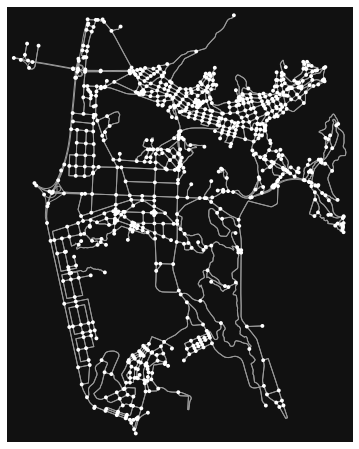

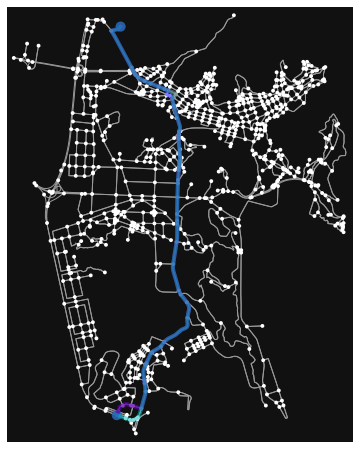

In [14]:
import networkx as nx
import osmnx as ox 
import matplotlib.pyplot as plt

place = "Saha-gu, Busan, Korea"
G = ox.graph_from_place(place, network_type="drive")
fig, ax = ox.plot_graph(G)

#input missing edge speeds and calculate edge travel times with the speed module
#누락된 엣지 속도를 입력하고 속도 모듈을 사용하여 에지 이동 시간을 계산합니다.
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

#get the nearest network nodes to two lat/lng points with the distance module
#거리 모듈을 사용하여 가장 가까운 네트워크 노드를 두 개의 Lat/lng 지점에 도달.....
orig = ox.distance.nearest_nodes(G, X=128.96755631796773, Y=35.11601594137444)
dest = ox.distance.nearest_nodes(G, X=128.96517223758627, Y=35.046698756214056)

#find the shortest path between nodes, minimizing travel time, then plot it
#이동 시간을 최소화하면서 노드 사이의 최단 경로를 찾은 다음 그래프로 그리기
routes = ox.k_shortest_paths(G, orig, dest, 3, weight="travel_time")
paths = [r for r in routes]
fig, ax = ox.plot_graph_routes(G, paths, route_colors=['r', 'b', 'c'], route_linewidth=3)

그래프를 통한 도시계획 분석 : 잠재 상권 분석
enterainments(V) : 주위 편의시설
travel_time(E) : 이동시간
traffic(v) : 주위 교통혼잡
cost(v) : 주위 부동산 가격

PotentialCommercialArea(G) 
= w1*enterainments(V) + w2*travel_time(E) + w3*traffic(v) + w4*cost(v)

그래프를 통한 도시계획 분석 : 동아대 인근 
1분 5분 10분 20분 30분 내로 걷거나 뛰어갈 수 있는 지역을 찾아보자

시간범위 ==> trip_time=[1,5,10,20,30]
임의로 정한 이동속도 (km/hour)
걷기 ==> travel_speed = 4.5 
뛰기 ==> travel_speed = 13

km/hour -> min/meter
meters_per_minute= travel_speed*1000/60

In [ ]:
import networkx as nx
import osmnx as ox 
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
from shapely geometry import LineString
from shapely geometry import Point
from shapely geometry import Polygon

address = "Hadan-dong,Sha-gu, Busan, Korea"
G = ox.graph_from_place(place, network_type="drive")
fig, ax = ox.plot_graph(G)